### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [137]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
Dataset investigation:
1- Missing Values: This part of the code will show you how many missing values 
2-Categorical Data: lists all unique values and their occurrence counts.
3- Outliers in Numerical Data

In [139]:
# Display the number of missing values per column
print("Missing values per column:")
print(data.isnull().sum())

# Display unique values for each categorical column
for column in data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{column}':")
    print(data[column].value_counts())

# Summary statistics for numerical columns to check for outliers
print("\nSummary statistics for numerical columns:")
print(data.describe())


Missing values per column:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Unique values in 'destination':
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

Unique values in 'passanger':
passan

3. Decide what to do about your missing data -- drop, replace, other...

Deciding whether to drop, replace, or take other actions with missing data depends on several factors including the nature of the data. Here is what I suggest:
1- High Proportion of Missing Data (e.g., the car column):only 108 non-null entries out of 12,684. It's better to drop this column
2- Moderate or Low Proportion of Missing Data (e.g., Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20to50): I  replaced the missing values with a new category like 'Unknown'
The code is as following:

In [142]:
#copy the datafile 
data2=data.copy()
# Drop the 'car' column from the dataset
data2.drop('car', axis=1, inplace=True)

# Replace missing values in 'Bar', 'CoffeeHouse',  'CarryAway' 'RestaurantLessThan20', 
# and 'Restaurant20to50' with 'Unknown'
data2['Bar'].fillna('Unknown', inplace=True)
data2['CoffeeHouse'].fillna('Unknown', inplace=True)
data2['CarryAway'].fillna('Unknown', inplace=True)
data2['RestaurantLessThan20'].fillna('Unknown', inplace=True)
data2['Restaurant20To50'].fillna('Unknown', inplace=True)

#verify if there is any more missing data
print("Missing values per column:")
print(data2.isnull().sum())

Missing values per column:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [144]:

# Calculate the proportion of observations where the coupon was accepted
accepted_coupons_proportion = data2['Y'].mean()*100
print(f"Proportion of accepted coupons: {accepted_coupons_proportion:.2f}%")


Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

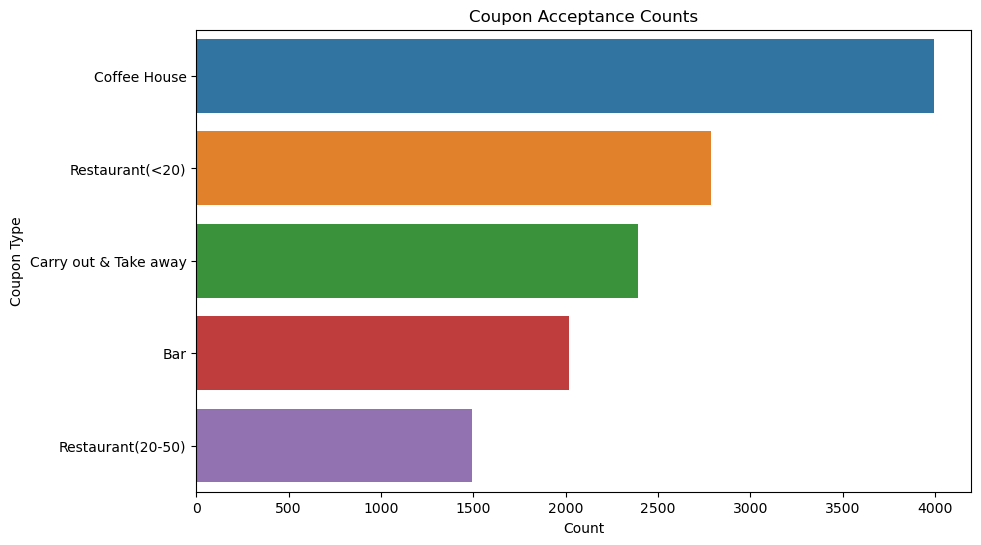

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'coupon' column
plt.figure(figsize=(10, 6))
sns.countplot(data=data2, y='coupon', order=data2['coupon'].value_counts().index)
plt.title('Coupon Acceptance Counts')
plt.xlabel('Count')
plt.ylabel('Coupon Type')
plt.savefig('./images/coupon_acc.jpeg', format='jpeg', dpi=300)
plt.show()

6. Use a histogram to visualize the temperature column.

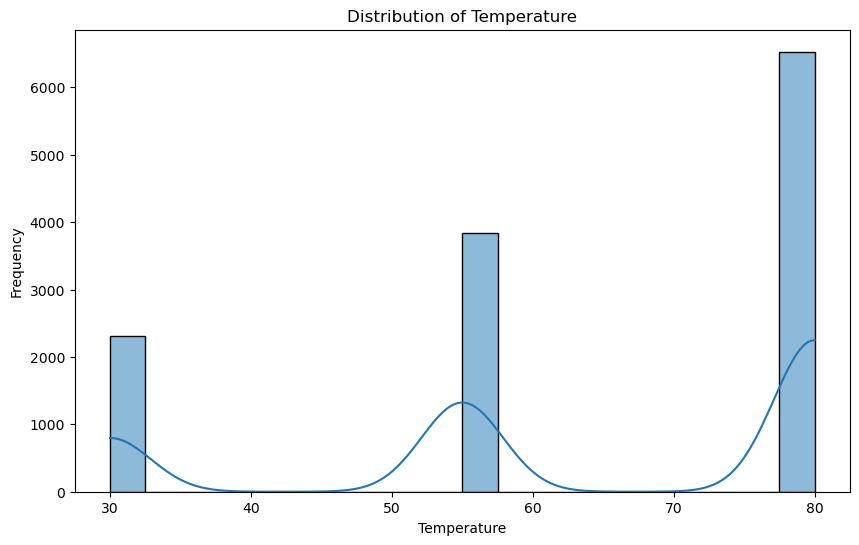

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the temperature column
plt.figure(figsize=(10, 6))
sns.histplot(data2['temperature'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('./images/temp_dist.png', format='png', dpi=300)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [153]:

bar_coupons_df = data2[data2['coupon'].str.contains("Bar")]

# Display the first few rows to confirm
print(bar_coupons_df.head())


        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never   Unknown   
13  Female  21  Unmarried partner  ...        never   Unknown   
17  Female  21  Unmarried partner  ...        never   Unknown   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                   4~8              1~3               

2. What proportion of bar coupons were accepted?


In [155]:
accepted_bar_coupons_proportion = bar_coupons_df['Y'].mean()*100
print(f"Proportion of accepted bar coupons: {accepted_bar_coupons_proportion:.2f}%")


Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [157]:

bar_3_or_fewer = bar_coupons_df[(bar_coupons_df['Bar'] == 'never') | \
    (bar_coupons_df['Bar'] == 'less1') | (bar_coupons_df['Bar'] == '1~3')]

# Filter the data for those who went to a bar more than 3 times a month
bar_more_than_3 = bar_coupons_df[(bar_coupons_df['Bar'] == '4~8') | (bar_coupons_df['Bar'] == 'gt8')]

# Calculate the acceptance rates for each group
acceptance_rate_3_or_fewer = bar_3_or_fewer['Y'].mean()*100
acceptance_rate_more_than_3 = bar_more_than_3['Y'].mean()*100

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_rate_3_or_fewer:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}%")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [159]:
# Define the group of drivers who go to a bar more than once a month and are over the age of 25
bar1_over25 = bar_coupons_df[((bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1')) & 
            (bar_coupons_df['age'].isin(['below21','21']) == False)]

# Define all other group 
bar_others= bar_coupons_df[(bar_coupons_df["age"].isin(['below21','21'])) & 
            (bar_coupons_df["Bar"].isin(["1~3","4~8","gt8"]) == False)]
    
    

# Calculate the acceptance rates for each group
acceptance_rate_bar1_over25 = bar1_over25['Y'].mean() *100
acceptance_rate_all_others = bar_others['Y'].mean()*100

print(f"Acceptance rate for those who went to a bar more than once per month and over 25 years:\
    {acceptance_rate_bar1_over25:.2f}%")
print(f"Acceptance rate for all others: {acceptance_rate_all_others:.2f}%")

Acceptance rate for those who went to a bar more than once per month and over 25 years:    68.18%
Acceptance rate for all others: 39.33%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [161]:
# Define the specific group: drivers who go to a bar more than once a month and
#had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

#print(bar_coupons_df['Bar'].value_counts())
bar_occ_group = bar_coupons_df[
                ((bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1')& 
                 (bar_coupons_df['Bar'] != 'Unknown')) & 
                (bar_coupons_df['passanger'] != 'Kid(s)') & 
                (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')
                ]

# Define the 'all others' group
other_drivers = bar_coupons_df[~
                 ((bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1')) & 
                (bar_coupons_df['passanger'] != 'Kid(s)') & 
                (bar_coupons_df['occupation'] != 'Farming Fishing & Forestry')
                ]

# Calculate the acceptance rates for each group
acceptance_rate_bar_occ_group  = bar_occ_group ['Y'].mean()*100
acceptance_rate_other_drivers= other_drivers['Y'].mean()*100

print(f"Acceptance rate for those who went to a bar more than once per month and their passanger was not a kid with no occupation Farming Fishing & Forestry \
    {acceptance_rate_bar_occ_group :.2f}%")
print(f"Acceptance rate for all others: {acceptance_rate_other_drivers:.2f}%")

Acceptance rate for those who went to a bar more than once per month and their passanger was not a kid with no occupation Farming Fishing & Forestry     71.32%
Acceptance rate for all others: 30.83%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [121]:
#print(bar_coupons_df['maritalStatus'].value_counts())
#print(bar_coupons_df['age'].value_counts())

# Define group1 which go to bars more than once a month, 
#had passengers that were not a kid, and were not widowed
group_1 = bar_coupons_df[
                ((bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1') &
                (bar_coupons_df['Bar'] != 'Unknown')) & 
                (~bar_coupons_df['passanger'].str.contains('Kid', case=False))  & 
                (bar_coupons_df['maritalStatus'] != 'Widowed')
                ]

# Define the  group2 which go to bars more than once a month, 
#and under age of 30
group_2 = bar_coupons_df[
                ((bar_coupons_df['Bar'] != 'never') & (bar_coupons_df['Bar'] != 'less1')&
                (bar_coupons_df['Bar'] != 'Unknown')) &  
                (bar_coupons_df['age'].isin(['21', '26', 'below21']))                 
                ]

#Define the  group3 which go to cheap restaurants more than 4 times a month and income is less than 50K
group_3 = bar_coupons_df[
                (bar_coupons_df['RestaurantLessThan20'].isin(['4~8','gt8']))  & 
                (bar_coupons_df['income'].isin(['Less than $12500','37500 - $49999', '$12500 - $24999',
                                                '$25000 - $37499']))                        
                ]


# Calculate the acceptance rates for each group
acceptance_rate_group1  = group_1 ['Y'].mean()*100
acceptance_rate_group2  = group_2 ['Y'].mean()*100
acceptance_rate_group3  = group_3 ['Y'].mean()*100

print(f"Acceptance rate for group1: {acceptance_rate_group1 :.2f}%")
print(f"Acceptance rate for group2: {acceptance_rate_group2 :.2f}%")
print(f"Acceptance rate for group3: {acceptance_rate_group3 :.2f}%")



Acceptance rate for group1: 71.32%
Acceptance rate for group2: 72.17%
Acceptance rate for group3: 43.90%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Summary of the observations:
Proportion of accepted bar coupons: 41.00%

Acceptance rate for those who went to a bar 3 or fewer times a month: 37.06%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%

Acceptance rate for those who went to a bar more than once per month and over 25 years:    68.18%
Acceptance rate for all others: 39.33%


Acceptance rate for those who went to a bar more than once per month and their passanger was not a kid with no occupation Farming Fishing & Forestry     71.32%
Acceptance rate for all others: 30.83%

group1: go to bars more than once a month,had none kid passengers, and were not widowed
Acceptance rate for group1: 71.32%
group2:  go to bars more than once a month, and under age of 30
Acceptance rate for group2: 72.17%
group3:go to cheap restaurants more than 4/month and income < 50K
Acceptance rate for group3: 43.90%

Analysis in the Readme.file

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's choose "restaurant coupons". I will analyze acceptance rates based on various attributes such as age, income level, marital status,  presence of children and occupation.

In [231]:
# Use data2 as the dataset since it is cleaned data of original data
#Analyze the data2

# Fill missing values with the mode (most frequent value)
for column in ['age', 'income', 'passanger', 'maritalStatus', 'occupation']:
    mode_value = data2[column].mode()[0]
    data2[column].fillna(mode_value, inplace=True)
    
# Filter for restaurant coupon data
restaurant_coupons = data2[(data2['coupon'].str.contains('Restaurant'))]

# Analyze acceptance rate by age group
age_groups = restaurant_coupons.pivot_table(values='Y', index='age', aggfunc='mean') * 100

# Analyze acceptance rate by income
income_groups = restaurant_coupons.pivot_table(values='Y', index='income', aggfunc='mean') * 100

# Analyze acceptance rate by dining frequency
dining_frequency = restaurant_coupons.pivot_table(values='Y', index='CarryAway', aggfunc='mean') * 100

# Analyze acceptance rate by passenger type
passenger_type = restaurant_coupons.pivot_table(values='Y', index='passanger', aggfunc='mean') * 100

# Analyze acceptance rate by passenger type
marital_type = restaurant_coupons.pivot_table(values='Y', index='maritalStatus', aggfunc='mean') * 100

print(age_groups)
print(income_groups)
print(dining_frequency)
print(passenger_type)
print(marital_type)

                 Y
age               
21       63.783160
26       65.099882
31       60.614934
36       58.605664
41       61.942257
46       65.948276
50plus   53.583062
below21  62.827225
                          Y
income                     
$100000 or More   63.605442
$12500 - $24999   58.181818
$25000 - $37499   67.161961
$37500 - $49999   59.637562
$50000 - $62499   67.927928
$62500 - $74999   58.450704
$75000 - $87499   58.471761
$87500 - $99999   50.649351
Less than $12500  59.663866
                   Y
CarryAway           
1~3        63.717377
4~8        62.438683
Unknown    66.666667
gt8        61.313869
less1      52.931854
never      64.150943
                   Y
passanger           
Alone      54.909984
Friend(s)  74.446680
Kid(s)     58.503401
Partner    72.180451
                           Y
maritalStatus               
Divorced           53.846154
Married partner    59.342561
Single             63.546187
Unmarried partner  64.864865
Widowed            43.478261


**What proportion of restaurant coupons  were accepted by each category? **

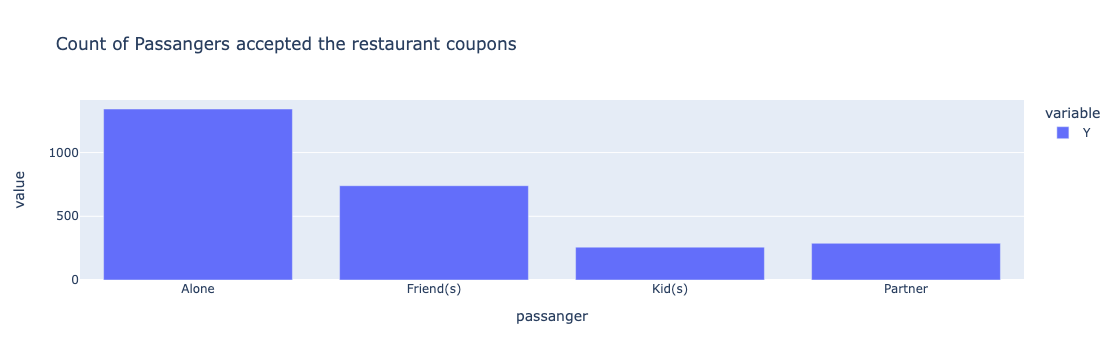

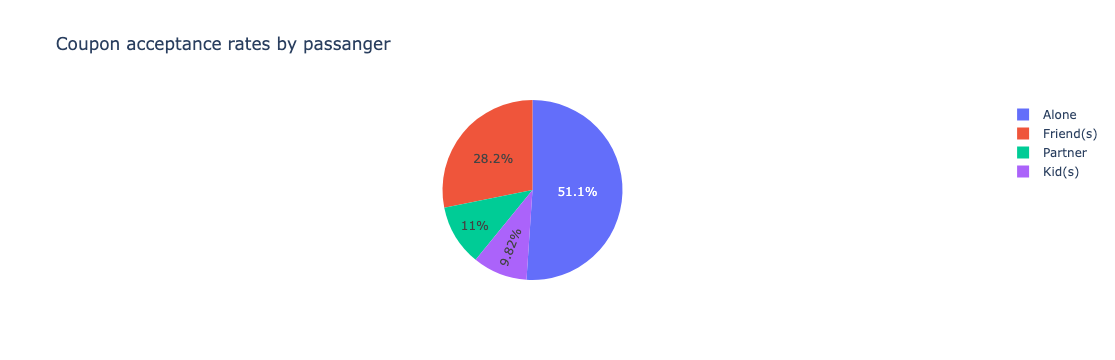

In [217]:
# Bar chart to visualize the count by passanger for Restaurant coupons
fig_bar_res_passanger = px.bar(restaurant_coupons.groupby("passanger")[["Y"]].sum()
                                ,title="Count of Passangers accepted the restaurant coupons")
# Pie chart to see the acceptance rate by passanger for Restaurant coupons
fig_pie_res_passanger = px.pie(restaurant_coupons, values="Y", names="passanger",title="Coupon acceptance rates by passanger")
fig_bar_res_passanger.show()
fig_pie_res_passanger.show()
fig_pie_res_passanger.write_image('./images/fig_pie_restaurant_passanger.png')


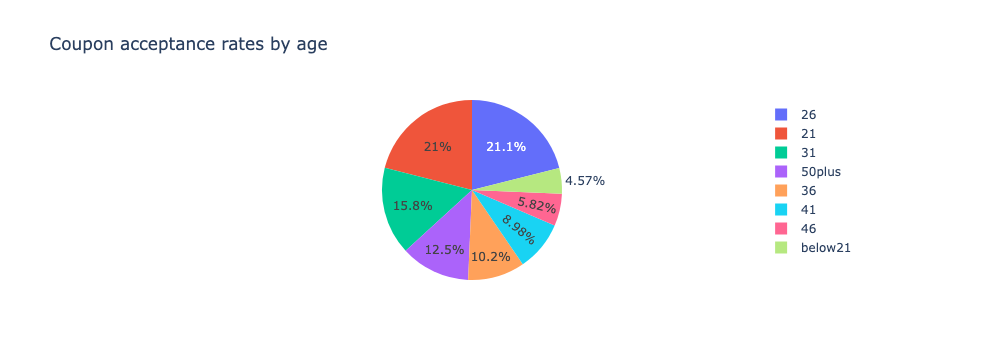

In [219]:
# Pie chart to see the acceptance rate by age for Restaurant coupons
fig_pie_res_age = px.pie(restaurant_coupons, values="Y", names="age",title="Coupon acceptance rates by age")
fig_pie_res_age.show()
fig_pie_res_age.write_image('./images/fig_pie_restaurant_age.png')

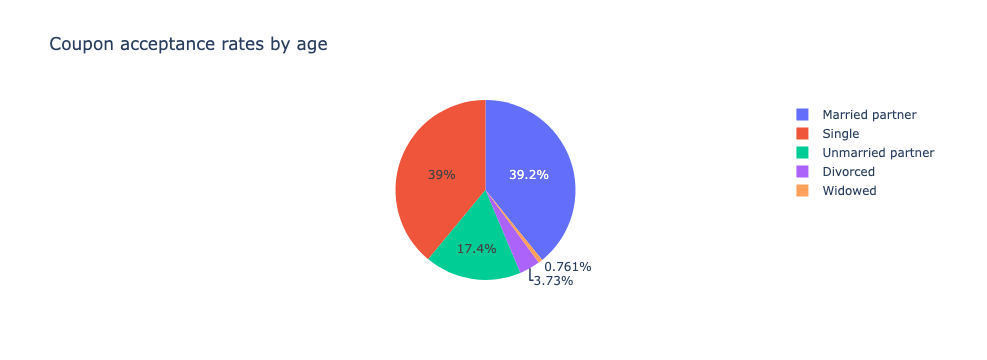

In [223]:
# Pie chart to see the acceptance rate by marital Status for Restaurant coupons
fig_pie_res_marital = px.pie(restaurant_coupons, values="Y", names="maritalStatus",title="Coupon acceptance rates by Marital Staus")
fig_pie_res_marital.show()
fig_pie_res_marital.write_image('./images/fig_pie_restaurant_marital.png')

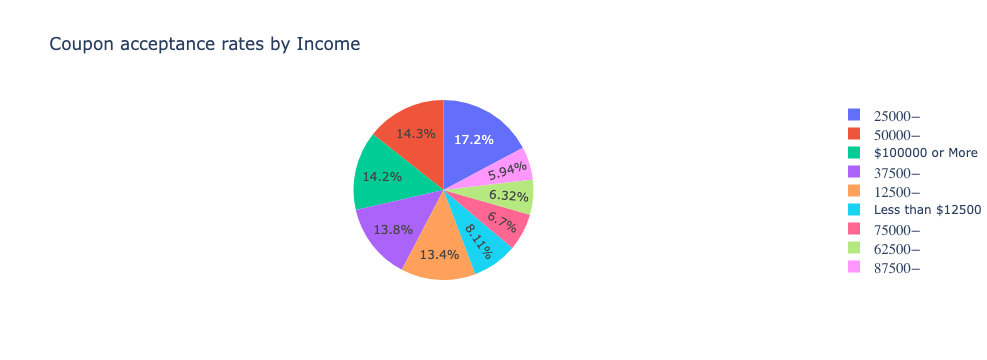

In [225]:
# Pie chart to see the acceptance rate by income for Restaurant coupons
fig_pie_res_income = px.pie(restaurant_coupons, values="Y", names="income",title="Coupon acceptance rates by Income")
fig_pie_res_income.show()
fig_pie_res_income.write_image('./images/fig_pie_restaurant_income.png')


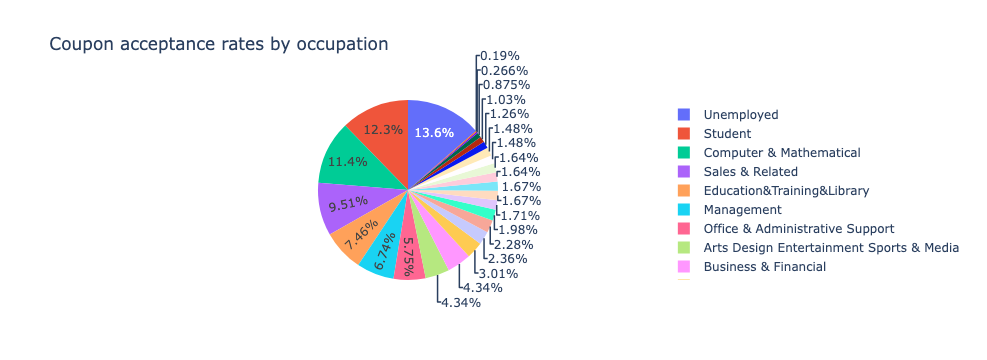

In [229]:
# Pie chart to see the acceptance rate by income for Restaurant coupons
fig_pie_res_occupation = px.pie(restaurant_coupons, values="Y", names="occupation",title="Coupon acceptance rates by occupation")
fig_pie_res_occupation.show()
fig_pie_res_occupation.write_image('./images/fig_pie_restaurant_occupation.png')


**Observations**: 
The acceptance rates of coupons show variation based on multiple factors such as age, income, marital status, occupation, and dining frequency. Notably, drivers who often dine alone accept coupons at a higher rate (51%). Among age groups, drivers between 21 and 35 years old show the highest acceptance rates for dining out coupons, totaling 58% across the age brackets of 21, 26, and 31. In terms of marital status, single and married drivers predominantly accept the coupons. Income also plays a significant role in coupon acceptance; drivers earning between $25,000 and $50,000 account for the highest proportion of coupon acceptance (31%), followed by those earning less than $25,000 (21.5%), $50,000 to $75,000 (20.6%), over $100,000 (14.2%), and $75,000 to $100,000 (12.7%). Occupation-wise, unemployed drivers have the highest coupon acceptance rate (13.6%), closely followed by students (12.3%).

# Conclusion: #

The demographic factors like age, income, marital status, and occupation significantly influence the acceptance of restaurant coupons among drivers. Younger drivers, particularly those aged between 21 and 35, are more likely to accept coupons, indicating a potential target demographic for marketing campaigns focused on dining out promotions.
Both single and married drivers are more likely to use coupons, suggesting that relationship status could be a useful factor in segmenting marketing strategies.There is a clear trend where drivers with lower to middle incomes (less than $75,000 annually) are more inclined to accept coupons, with the highest acceptance among those earning between $25,000 and $50,000. This suggests that coupon promotions might be more appealing to drivers looking for budget-friendly dining options.
Unemployed drivers and students show higher rates of coupon acceptance, potentially reflecting greater price sensitivity and openness to discounts among these groups.

Marketing efforts might be particularly effective if they focus on younger drivers, those with lower to middle incomes, and specific groups like students and unemployed individuals, who are more likely to respond to coupon-based promotions.

**Will the Customer Accept the Coupon?** Yes, based on the sample dataset the majority of drivers accepted the coupon.




